In [1]:
#importing all the necessary mathematical, data handling & visulaization libraries
import pandas as pd
import numpy as np
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import MinMaxScaler, StandardScaler
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
import os as os
from datetime import datetime

# 1. A) Import ‘signal-data.csv’ as DataFrame

In [2]:
signal_df = pd.read_csv('signal-data.csv')                           #Answer

In [3]:
signal_df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [6]:
signal_df.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
4            float64
5            float64
6            float64
7            float64
8            float64
9            float64
10           float64
11           float64
12           float64
13           float64
14           float64
15           float64
16           float64
17           float64
18           float64
19           float64
20           float64
21           float64
22           float64
23           float64
24           float64
25           float64
26           float64
27           float64
28           float64
29           float64
30           float64
31           float64
32           float64
33           float64
34           float64
35           float64
36           float64
37           float64
38           float64
39           float64
40           float64
41           float64
42           float64
43           float64
44           float64
45           float64
46           

In [4]:
signal_df.shape

(1567, 592)

# 1. B) Print 5 point summary and share at least 2 observations. 

In [5]:
signal_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


# 2. A) Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature

In [6]:
perc = 20.0                                                                      #Answer
min_count =  int(((100-perc)/100)*signal_df.shape[0] + 1)
signal_df_modified = signal_df.dropna( axis=1, thresh=min_count)

for i in signal_df_modified.columns[signal_df_modified.isnull().any(axis=0)]:     
    signal_df_modified[i].fillna(signal_df_modified[i].mean(),inplace= True)
signal_df_modified.shape


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


(1567, 560)

In [7]:
signal_df_modified.isna().sum()                                                #Answer

Time         0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
30           0
31           0
32           0
33           0
34           0
35           0
36           0
37           0
38           0
39           0
40           0
41           0
42           0
43           0
44           0
45           0
46           0
47           0
48           0
49           0
50           0
51           0
52           0
53           0
54           0
55           0
56           0
57           0
58           0
59           0
60           0
61           0
62           0
63           0
64           0
65        

In [8]:
# #perc = 20.0
# #min_count =  int(((100-perc)/100)*df.shape[0] + 1)


# for i in df.columns[df.isnull().any(axis=0)]:
#     if (df[i].isna().sum() > 319):
#         df.drop( df.columns[i], axis=1, inplace= True)
    
#     else:
#         df[i].fillna(df[i].mean(),inplace= True)
# df.shape


# 2. B) Identify and drop the features which are having same value for all the rows

In [9]:
signal_df_modified.drop('Time', axis= 1, inplace= True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
signal_df_modified.shape

(1567, 559)

In [11]:
signal_df_modified.head()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


In [13]:
signal_df_modified_dup_cols_removed = signal_df_modified.T.drop_duplicates().T  #Answer - To remove duplicate columns based on values

In [14]:
signal_df_modified_dup_cols_removed.shape                                   

(1567, 447)

In [15]:
signal_df_modified_dup_cols_removed.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=447)

In [16]:
def getDuplicateColumns(df):                    #Alternate solution 
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x & y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [17]:
duplicateColumnNames = getDuplicateColumns(signal_df_modified)
print('Duplicate Columns are as follows')
counter= 0
for col in duplicateColumnNames:
    print('Column name : ', col)
    counter= counter+ 1
print(counter)

Duplicate Columns are as follows
Column name :  257
Column name :  330
Column name :  498
Column name :  461
Column name :  394
Column name :  515
Column name :  533
Column name :  536
Column name :  528
Column name :  192
Column name :  186
Column name :  314
Column name :  534
Column name :  52
Column name :  400
Column name :  535
Column name :  284
Column name :  243
Column name :  276
Column name :  396
Column name :  414
Column name :  395
Column name :  264
Column name :  375
Column name :  190
Column name :  234
Column name :  260
Column name :  501
Column name :  509
Column name :  463
Column name :  97
Column name :  141
Column name :  258
Column name :  512
Column name :  241
Column name :  465
Column name :  237
Column name :  401
Column name :  481
Column name :  508
Column name :  506
Column name :  149
Column name :  266
Column name :  371
Column name :  372
Column name :  369
Column name :  450
Column name :  256
Column name :  261
Column name :  327
Column name :  399


# 2. C) Drop other features if required using relevant functional knowledge. Clearly justify the same

In [18]:
signal_df_modified_dup_cols_removed.isna().sum() # We will try all the rest of the features without dropping any ofthem

0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
30           0
31           0
32           0
33           0
34           0
35           0
36           0
37           0
38           0
39           0
40           0
41           0
42           0
43           0
44           0
45           0
46           0
47           0
48           0
49           0
50           0
51           0
53           0
54           0
55           0
56           0
57           0
58           0
59           0
60           0
61           0
62           0
63           0
64           0
65           0
66           0
67        

In [19]:
signal_df_modified_dup_cols_removed.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1567.0,3014.452896,73.480613,2743.2400,2966.66500,3011.840000,3056.540000,3356.3500
1,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.910000,2538.745000,2846.4400
2,1567.0,2200.547318,29.380932,2060.6600,2181.09995,2200.955600,2218.055500,2315.2667
3,1567.0,1396.376627,439.712852,0.0000,1083.88580,1287.353800,1590.169900,3715.0417
4,1567.0,4.197013,56.103066,0.6815,1.01770,1.317100,1.529600,1114.5366
5,1567.0,100.000000,0.000000,100.0000,100.00000,100.000000,100.000000,100.0000
6,1567.0,101.112908,6.209271,82.1311,97.93780,101.492200,104.530000,129.2522
7,1567.0,0.121822,0.008936,0.0000,0.12110,0.122400,0.123800,0.1286
8,1567.0,1.462862,0.073849,1.1910,1.41125,1.461600,1.516850,1.6564
9,1567.0,-0.000841,0.015107,-0.0534,-0.01080,-0.001300,0.008400,0.0749


# 2. D) Check for multi-collinearity in the data and take necessary action

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [21]:
signal_df_modified_dup_cols_removed.dtypes

0            float64
1            float64
2            float64
3            float64
4            float64
5            float64
6            float64
7            float64
8            float64
9            float64
10           float64
11           float64
12           float64
13           float64
14           float64
15           float64
16           float64
17           float64
18           float64
19           float64
20           float64
21           float64
22           float64
23           float64
24           float64
25           float64
26           float64
27           float64
28           float64
29           float64
30           float64
31           float64
32           float64
33           float64
34           float64
35           float64
36           float64
37           float64
38           float64
39           float64
40           float64
41           float64
42           float64
43           float64
44           float64
45           float64
46           float64
47           

In [22]:
vif = []                                #Let us consider threshold as 10
for feature in range(signal_df_modified_dup_cols_removed.shape[1]):
    vif.append(variance_inflation_factor(exog= signal_df_modified_dup_cols_removed.values, exog_idx= feature ))
print(vif)

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[14.379405943188479, 9.875504742156549, 27.522823447716704, 11.51440419095992, 42292.25270867556, 0.0, 8.369155491808067, 2.0229608296443162, 7.771432010554366, 1.738259882090606, 1.632203353910429, 19.662184281963114, 2597.544710933526, nan, 14.348446230846136, 6.574444985223525, 1481.6387694507334, 23.28664751753682, 1910.3487666049566, 12.715415193140586, 2.1289941567189055, 15.389394108016056, 17.120016071449378, 1.5005996722982702, 1.5652386438806503, 107.15848348546747, 62.11992410023723, 63.248832744731644, 15.873791085130287, 8.697625002887708, 12.299090883760583, 30.248875401323314, 51.44180993644025, 11.796446815662716, 2552966941.3374767, 51.16628617510933, 2552929314.5141015, 108.59715655425478, 15.365311979005515, 12.921355658975438, 1.8035701559273527, 1.713466736237102, 0.0, 15673689691.0244, 26.601905015534886, 24842923094.66688, 2457.7732665049784, 15.201741305565905, 8253354373.018251, 0.0, 30127636585.65797, 21.672008287428206, 14618.297123707802, 15307.591711338222,

In [23]:
len(vif)

447

In [24]:
signal_df_vif = pd.DataFrame({'feature_name': signal_df_modified_dup_cols_removed.columns,        #Storing the VIF values and column names
                   'vif' : np.around(vif, 2)})

In [27]:
signal_df_vif.head(10)

,feature_name,vif
0,0,14.38
1,1,9.88
2,2,27.52
3,3,11.51
4,4,42292.25
5,5,0.00
6,6,8.37
7,7,2.02
8,8,7.77
9,9,1.74


In [26]:
signal_df_vif[signal_df_vif['vif'] < 10].count()

feature_name    80
vif             80
dtype: int64

In [28]:
signal_df_vif_removed_1 = signal_df_modified_dup_cols_removed[['1',   # Answer  #There are 80 columns/features which has Variance Inflation Factor
                        # Less than VIF (Industry Practice)threshold 10 value. Hence, considering those feature finally
'5',
'6',
'7',
'8',
'9',
'10',
'15',
'20',
'23',
'24',
'29',
'40',
'41',
'42',
'49',
'55',
'58',
'59',
'71',
'75',
'76',
'77',
'78',
'79',
'80',
'81',
'82',
'83',
'84',
'87',
'88',
'91',
'95',
'101',
'102',
'103',
'107',
'108',
'113',
'116',
'118',
'125',
'126',
'128',
'129',
'130',
'316',
'367',
'368',
'418',
'419',
'432',
'433',
'438',
'468',
'476',
'482',
'483',
'484',
'485',
'486',
'487',
'488',
'489',
'499',
'500',
'510',
'511',
'521',
'544',
'546',
'547',
'563',
'570',
'571',
'582',
'586',
'589',
'Pass/Fail']]

In [29]:
signal_df_vif_removed_1.shape

(1567, 80)

In [30]:
signal_df_vif_removed_1['Time'] = signal_df['Time']          #Adding back Time column

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
signal_df_vif_removed_1.head()                        # Answer

,1,5,6,7,8,9,10,15,20,23,...,546,547,563,570,571,582,586,589,Pass/Fail,Time
0,2564.00,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,414.8710,1.4026,-4043.75,...,1.0616,395.570,0.679641,533.8500,2.1113,0.5005,0.021458,99.670066,-1.0,2008-07-19 11:55:00
1,2465.14,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,414.7347,1.3825,-3498.75,...,1.3526,408.798,0.679641,535.0164,2.4335,0.5019,0.009600,208.204500,-1.0,2008-07-19 12:32:00
2,2559.94,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,416.7075,1.4123,-4047.00,...,0.7942,411.136,0.903200,535.0245,2.0293,0.4958,0.058400,82.860200,1.0,2008-07-19 13:17:00
3,2479.90,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,422.2894,1.4011,-4515.00,...,1.1650,372.822,0.651100,530.5682,2.0253,0.4990,0.020200,73.843200,-1.0,2008-07-19 14:43:00
4,2502.87,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,420.5925,1.3888,-3987.50,...,1.4636,399.914,0.679641,532.0155,2.0275,0.4800,0.020200,73.843200,-1.0,2008-07-19 15:22:00


# 2. E) Make all relevant modifications on the data using both functional/logical reasoning/assumptions.

In [32]:
#signal_df_vif_removed_1.duplicated()              No duplicate rows in the data
signal_df_vif_removed_1['year'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).year
signal_df_vif_removed_1['month'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).month
signal_df_vif_removed_1['date'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).day
signal_df_vif_removed_1['week_day'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).weekday
signal_df_vif_removed_1['start_time'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).time
signal_df_vif_removed_1['hour'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).hour
signal_df_vif_removed_1['min'] = pd.DatetimeIndex(signal_df_vif_removed_1['Time']).minute

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [33]:
signal_df_vif_removed_1['Pass/Fail'].value_counts()

-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

In [34]:
signal_df_vif_removed_1.head()

,1,5,6,7,8,9,10,15,20,23,...,589,Pass/Fail,Time,year,month,date,week_day,start_time,hour,min
0,2564.00,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,414.8710,1.4026,-4043.75,...,99.670066,-1.0,2008-07-19 11:55:00,2008,7,19,5,11:55:00,11,55
1,2465.14,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,414.7347,1.3825,-3498.75,...,208.204500,-1.0,2008-07-19 12:32:00,2008,7,19,5,12:32:00,12,32
2,2559.94,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,416.7075,1.4123,-4047.00,...,82.860200,1.0,2008-07-19 13:17:00,2008,7,19,5,13:17:00,13,17
3,2479.90,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,422.2894,1.4011,-4515.00,...,73.843200,-1.0,2008-07-19 14:43:00,2008,7,19,5,14:43:00,14,43
4,2502.87,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,420.5925,1.3888,-3987.50,...,73.843200,-1.0,2008-07-19 15:22:00,2008,7,19,5,15:22:00,15,22


# 3. A) Perform a detailed univariate Analysis with appropriate detailed comments after each analysis.

There is heavy imbalance in the output feature with 1463 values as PASS and 104 as FAIL. The data is biased towards PASS outcome


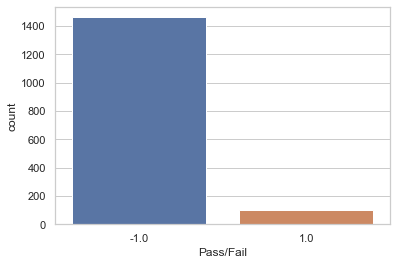

In [35]:
sns.countplot(data= signal_df_vif_removed_1, x= signal_df_vif_removed_1['Pass/Fail'])
print('There is heavy imbalance in the output feature with 1463 values as PASS and 104 as FAIL. The data is biased towards PASS outcome')

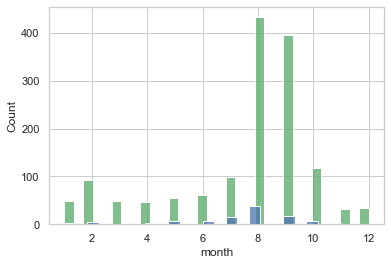

In [36]:
#We see that the failures (Pass_Fail=1) peak in August which is also the peak for pass.
#August and September are months with most product and most failures as well
#The failures seem to subside from September onwards post some correction 
#(May-Aug we see more failures than passes)
sns.histplot( signal_df_vif_removed_1[signal_df_vif_removed_1['Pass/Fail'] == -1]['month'], color = 'g');
sns.histplot( signal_df_vif_removed_1[signal_df_vif_removed_1['Pass/Fail'] == 1]['month'], color = 'b');

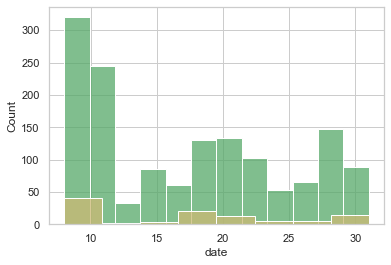

In [37]:
#The failures tend to decrease towards month end
sns.histplot( signal_df_vif_removed_1[signal_df_vif_removed_1['Pass/Fail'] == -1]['date'], color = 'g');
sns.histplot( signal_df_vif_removed_1[signal_df_vif_removed_1['Pass/Fail'] == 1]['date'], color = 'y');

# 3. B) Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis

Text(0.5, 1.0, 'Correlation heatmap for the Data')

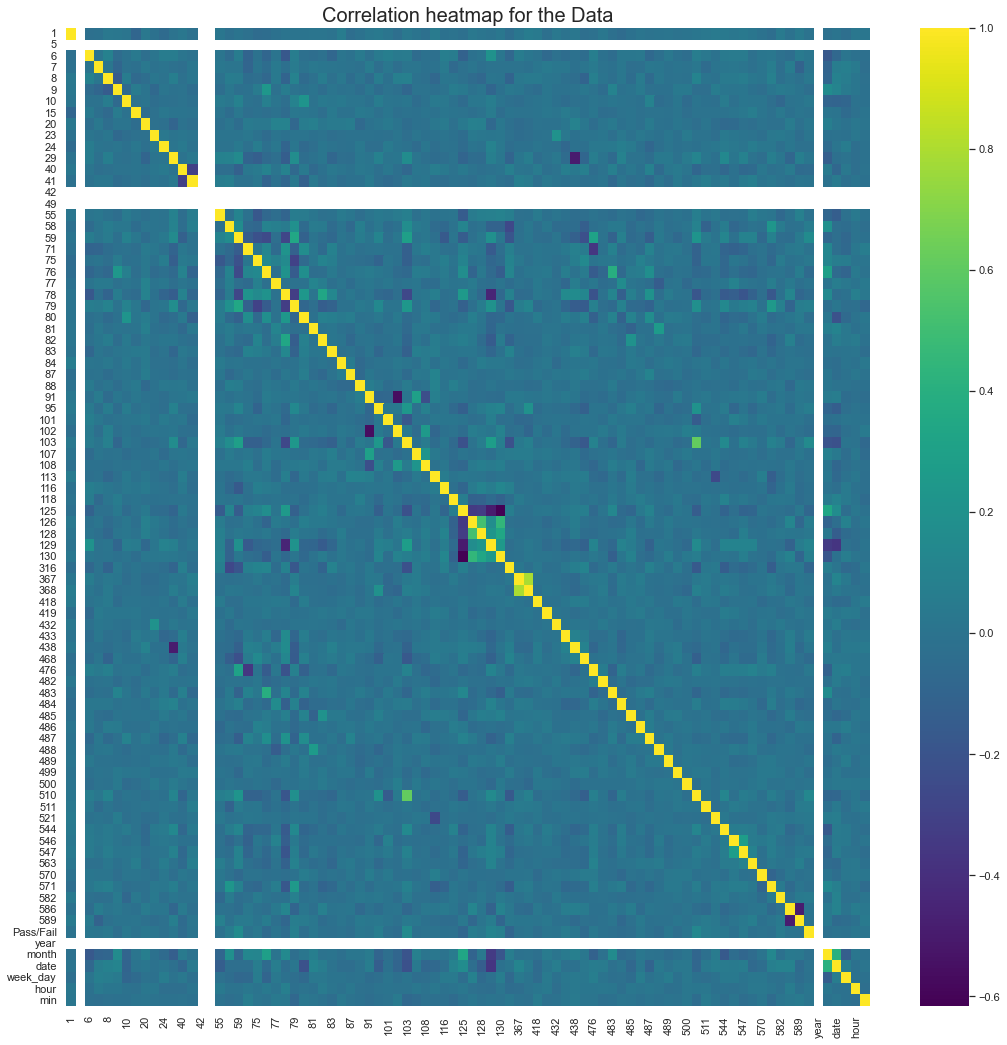

In [38]:
plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(signal_df_vif_removed_1.corr(), cmap = "viridis")
plt.title('Correlation heatmap for the Data', fontsize = 20)

In [269]:
print('Few features like 129, 78, 109, 587 have very less correlation with few features')

Few features like 129, 78, 109, 587 have very less correlation with few features


In [270]:
print('Few features like 410 have very strong correlation with features like 367, 368')

Few features like 410 have very strong correlation with features like 367, 368


# 4. A) Segregate predictors vs target attributes

In [39]:
backup_df = signal_df_vif_removed_1.copy(deep= True)

In [40]:
backup_df.drop(['Time','year','month','date','week_day','hour','min','start_time'], axis= 1, inplace= True)

In [41]:
backup_df.head()

,1,5,6,7,8,9,10,15,20,23,...,544,546,547,563,570,571,582,586,589,Pass/Fail
0,2564.00,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,414.8710,1.4026,-4043.75,...,0.0026,1.0616,395.570,0.679641,533.8500,2.1113,0.5005,0.021458,99.670066,-1.0
1,2465.14,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,414.7347,1.3825,-3498.75,...,0.0026,1.3526,408.798,0.679641,535.0164,2.4335,0.5019,0.009600,208.204500,-1.0
2,2559.94,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,416.7075,1.4123,-4047.00,...,0.0026,0.7942,411.136,0.903200,535.0245,2.0293,0.4958,0.058400,82.860200,1.0
3,2479.90,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,422.2894,1.4011,-4515.00,...,0.0026,1.1650,372.822,0.651100,530.5682,2.0253,0.4990,0.020200,73.843200,-1.0
4,2502.87,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,420.5925,1.3888,-3987.50,...,0.0026,1.4636,399.914,0.679641,532.0155,2.0275,0.4800,0.020200,73.843200,-1.0


In [42]:
backup_df = backup_df.T.reset_index(drop=True).T

In [43]:
backup_df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,2564.00,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,414.8710,1.4026,-4043.75,...,0.0026,1.0616,395.570,0.679641,533.8500,2.1113,0.5005,0.021458,99.670066,-1.0
1,2465.14,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,414.7347,1.3825,-3498.75,...,0.0026,1.3526,408.798,0.679641,535.0164,2.4335,0.5019,0.009600,208.204500,-1.0
2,2559.94,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,416.7075,1.4123,-4047.00,...,0.0026,0.7942,411.136,0.903200,535.0245,2.0293,0.4958,0.058400,82.860200,1.0
3,2479.90,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,422.2894,1.4011,-4515.00,...,0.0026,1.1650,372.822,0.651100,530.5682,2.0253,0.4990,0.020200,73.843200,-1.0
4,2502.87,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,420.5925,1.3888,-3987.50,...,0.0026,1.4636,399.914,0.679641,532.0155,2.0275,0.4800,0.020200,73.843200,-1.0


In [44]:
backup_df.rename(columns= {79: 'Pass/Fail'}, inplace= True)       #In this notebook I have used backup_df dataframe as the main one only going forward below

In [45]:
X = backup_df.drop(labels= ['Pass/Fail'], axis= 1)              #Answer
y = backup_df['Pass/Fail']

In [46]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,2564.00,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,414.8710,1.4026,-4043.75,...,0.0,0.0026,1.0616,395.570,0.679641,533.8500,2.1113,0.5005,0.021458,99.670066
1,2465.14,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,414.7347,1.3825,-3498.75,...,0.0,0.0026,1.3526,408.798,0.679641,535.0164,2.4335,0.5019,0.009600,208.204500
2,2559.94,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,416.7075,1.4123,-4047.00,...,0.0,0.0026,0.7942,411.136,0.903200,535.0245,2.0293,0.4958,0.058400,82.860200
3,2479.90,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,422.2894,1.4011,-4515.00,...,0.0,0.0026,1.1650,372.822,0.651100,530.5682,2.0253,0.4990,0.020200,73.843200
4,2502.87,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,420.5925,1.3888,-3987.50,...,0.0,0.0026,1.4636,399.914,0.679641,532.0155,2.0275,0.4800,0.020200,73.843200


In [47]:
y.head()

0   -1.0
1   -1.0
2    1.0
3   -1.0
4   -1.0
Name: Pass/Fail, dtype: float64

# 4. B) Check for target balancing and fix it if found imbalanced.

In [48]:
y.value_counts()

-1.0    1463
 1.0     104
Name: Pass/Fail, dtype: int64

In [49]:
print('-1 class has percentage of ' + str((1463/1567)*100))       # 
print('1 class has percentage of ' + str((104/1567)*100))

-1 class has percentage of 93.36311423101468
1 class has percentage of 6.636885768985322


In [50]:
from imblearn.over_sampling import RandomOverSampler  # We will be using oversampling process as if we use undersampling we might lose some information

In [51]:
ros = RandomOverSampler()

In [52]:
X_os, y_os = ros.fit_sample(X, y)

In [53]:
print(X.shape)
print(y.shape)
print(X_os.shape)
print(y_os.shape)

(1567, 79)
(1567,)
(2926, 79)
(2926,)


In [54]:
y_os.value_counts()                         # Answer  The target variable is now balanced correctly 50% - 50%

 1.0    1463
-1.0    1463
Name: Pass/Fail, dtype: int64

# 4. C) Perform train-test split and standardise the data or vice versa if required

In [55]:
X_os_train, X_os_test, y_os_train, y_os_test = train_test_split (X_os, y_os,  test_size= 0.20, random_state= 2)   #Answer

In [56]:
print(X_os_train.shape)
print(X_os_test.shape)
print(y_os_train.shape)
print(y_os_test.shape)

(2340, 79)
(586, 79)
(2340,)
(586,)


In [132]:
scaler_os_for_full_X = StandardScaler() 

In [134]:
scaler_os_for_full_X.fit(X_os)

StandardScaler()

In [136]:
scaled_features_full_X = scaler_os_for_full_X.transform(X_os)

In [137]:
scaled_features_full_X

array([[ 0.8948606 ,  0.        , -0.63553624, ...,  0.03430639,
        -0.02789604,  0.01095445],
       [-0.4086243 ,  0.        ,  0.18320635, ...,  0.42983458,
        -1.02969222,  1.26627144],
       [ 0.84132885,  0.        , -1.00345112, ..., -1.29353826,
         3.09291567, -0.18346967],
       ...,
       [ 0.2427226 ,  0.        ,  0.72923668, ..., -0.61548993,
        -1.01279629,  1.3666927 ],
       [ 0.60795152,  0.        ,  1.60624327, ...,  0.51459062,
        -0.573502  ,  0.02318943],
       [-0.30314302,  0.        ,  0.63825759, ...,  0.93837083,
         0.23750283, -0.35344465]])

In [139]:
Full_X_scaled_df = pd.DataFrame(scaled_features_full_X, columns= [0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
51,
52,
53,
54,
55,
56,
57,
58,
59,
60,
61,
62,
63,
64,
65,
66,
67,
68,
69,
70,
71,
72,
73,
74,
75,
76,
77,
78
] ) 

In [140]:
Full_X_scaled_df.head(2)               # This is for PCA algorithm purpose - Scaling full X data

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.894861,0.0,-0.635536,0.329169,0.516387,1.241045,-0.420510,0.139203,-0.203531,-0.178504,...,-0.148603,0.285478,0.061504,-1.941540,0.037865,0.175326,0.067484,0.034306,-0.027896,0.010954
1,-0.408624,0.0,0.183206,0.404164,0.458147,0.076671,-1.598573,0.129189,-1.480732,0.209764,...,-0.148603,0.285478,0.891483,1.113715,0.037865,0.232232,1.089693,0.429835,-1.029692,1.266271


In [141]:
print('*************************************************************************************************')

*************************************************************************************************


In [57]:
scaler_os = StandardScaler()             # Now scaling the independent features after oversampling the data

In [58]:
scaler_os.fit(X_os_train)

StandardScaler()

In [59]:
scaled_features_X_os_train = scaler_os.transform(X_os_train)

In [60]:
scaled_features_X_os_test = scaler_os.transform(X_os_test)   #Here directly we are transforming the test data

In [61]:
scaled_features_X_os_train                                 # Standardizing the data

array([[ 0.24971404,  0.        ,  0.70640978, ..., -0.61774856,
        -1.02047081,  1.39199911],
       [ 0.22411724,  0.        ,  0.74760404, ...,  0.52208169,
         1.64117816, -0.38427862],
       [-0.51805733,  0.        ,  0.48648695, ..., -0.01933768,
        -1.46984011,  3.42000995],
       ...,
       [ 0.84294972,  0.        , -0.34127557, ..., -0.90270613,
         0.08566902, -0.61107023],
       [-1.66792393,  0.        , -0.90527969, ..., -0.01933768,
         0.0770273 , -0.15388774],
       [-1.41871985,  0.        ,  1.47885719, ...,  1.29146711,
        -0.07852361,  0.55225237]])

In [62]:
scaled_features_X_os_test                                             # Standardizing the data

array([[-0.24803098,  0.        , -1.8982256 , ..., -0.01933768,
        -0.54517635, -0.7985492 ],
       [ 0.6170878 ,  0.        ,  1.56425952, ...,  0.52208169,
        -0.5711015 ,  0.02301617],
       [ 0.6170878 ,  0.        ,  1.56425952, ...,  0.52208169,
        -0.5711015 ,  0.02301617],
       ...,
       [ 1.81920902,  0.        ,  0.09912883, ..., -1.04518491,
        -0.80442787, -0.26301015],
       [-0.6162005 ,  0.        ,  0.57453058, ..., -2.07103214,
         0.9671242 , -0.32105454],
       [-1.77999282,  0.        ,  0.82680945, ..., -1.10217642,
         1.02761622, -0.86770842]])

In [63]:
X_os_train_scaled_df = pd.DataFrame(scaled_features_X_os_train, columns= [0,
1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
51,
52,
53,
54,
55,
56,
57,
58,
59,
60,
61,
62,
63,
64,
65,
66,
67,
68,
69,
70,
71,
72,
73,
74,
75,
76,
77,
78
] )

In [64]:
X_os_train_scaled_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,0.249714,0.0,0.706410,0.325370,1.368042,-2.123028,-1.491160,1.828607,1.480303,1.239406,...,-0.146924,0.293343,-0.855246,-0.779908,0.045962,0.282947,-0.331193,-0.617749,-1.020471,1.391999
1,0.224117,0.0,0.747604,0.358962,-0.648367,0.031191,-0.088762,-0.098014,0.383465,-0.601989,...,-0.146924,-0.432333,-0.594657,-0.384628,-1.128218,0.153486,0.999128,0.522082,1.641178,-0.384279


In [65]:
X_os_test_scaled_df = pd.DataFrame(scaled_features_X_os_test, columns= [0,1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
51,
52,
53,
54,
55,
56,
57,
58,
59,
60,
61,
62,
63,
64,
65,
66,
67,
68,
69,
70,
71,
72,
73,
74,
75,
76,
77,
78
] )

In [66]:
X_os_test_scaled_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,-0.248031,0.0,-1.898226,-1.018296,0.045563,0.608465,2.148886,-0.616117,1.340009,0.292434,...,-0.146924,2.107535,-0.008600,-0.096332,-1.128218,0.081033,0.519620,-0.019338,-0.545176,-0.798549
1,0.617088,0.0,1.564260,-0.161709,0.171867,-0.813601,0.746489,-0.253092,0.147518,-0.813083,...,-0.146924,0.293343,0.006876,-2.289326,0.045962,0.183225,-0.639057,0.522082,-0.571102,0.023016


# 4. D) Check if the train and test data have similar statistical characteristics when compared with original data

In [267]:
print('Test and Train data have similar statistical charecteristics with original data')

Test and Train data have similar statistical charecteristics with original data


In [67]:
X.describe().T                 #Answer  

,count,mean,std,min,25%,50%,75%,max
0,1567.0,2495.850231,80.227793,2158.7500,2452.88500,2498.910000,2538.74500,2846.4400
1,1567.0,100.000000,0.000000,100.0000,100.00000,100.000000,100.00000,100.0000
2,1567.0,101.112908,6.209271,82.1311,97.93780,101.492200,104.53000,129.2522
3,1567.0,0.121822,0.008936,0.0000,0.12110,0.122400,0.12380,0.1286
4,1567.0,1.462862,0.073849,1.1910,1.41125,1.461600,1.51685,1.6564
5,1567.0,-0.000841,0.015107,-0.0534,-0.01080,-0.001300,0.00840,0.0749
6,1567.0,0.000146,0.009296,-0.0349,-0.00560,0.000400,0.00590,0.0530
7,1567.0,413.086035,17.204591,333.4486,406.13100,412.262900,419.08280,824.9271
8,1567.0,1.405054,0.016737,1.1797,1.39650,1.406000,1.41500,1.4534
9,1567.0,-3806.299734,1379.280537,-9986.7500,-4370.62500,-3819.750000,-3356.37500,2363.0000


In [68]:
X_os_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2340.0,2495.711548,75.416167,2162.8700,2455.275000,2500.850000,2536.480000,2846.4400
1,2340.0,100.000000,0.000000,100.0000,100.000000,100.000000,100.000000,100.0000
2,2340.0,101.325629,5.907425,82.1311,98.682200,101.512200,104.298900,129.2522
3,2340.0,0.122063,0.005955,0.0000,0.121100,0.122200,0.123700,0.1286
4,2340.0,1.466434,0.067312,1.1910,1.424000,1.464900,1.511675,1.6564
5,2340.0,-0.001543,0.014208,-0.0534,-0.010500,-0.001300,0.006725,0.0609
6,2340.0,0.000661,0.009700,-0.0329,-0.005500,0.001200,0.006700,0.0530
7,2340.0,412.999976,11.921032,389.4671,406.759075,412.626200,418.738400,824.9271
8,2340.0,1.405787,0.015685,1.1797,1.397000,1.406800,1.415900,1.4503
9,2340.0,-3802.517420,1398.966922,-9986.7500,-4400.312500,-3806.299734,-3309.333300,2363.0000


In [69]:
X_os_test.describe().T

,count,mean,std,min,25%,50%,75%,max
0,586.0,2497.807083,77.629429,2158.7500,2459.707500,2500.395000,2539.500000,2806.9100
1,586.0,100.000000,0.000000,100.0000,100.000000,100.000000,100.000000,100.0000
2,586.0,101.122208,5.231661,83.1700,98.682200,101.147800,104.101425,123.4244
3,586.0,0.121776,0.008970,0.0000,0.121100,0.122350,0.123800,0.1276
4,586.0,1.463872,0.065629,1.2956,1.415550,1.464500,1.507100,1.6486
5,586.0,-0.001826,0.014890,-0.0472,-0.010250,-0.002200,0.006200,0.0749
6,586.0,0.000703,0.009602,-0.0349,-0.005275,0.001300,0.006500,0.0285
7,586.0,412.881962,18.930475,333.4486,406.338625,411.600600,418.653250,817.0030
8,586.0,1.405868,0.015973,1.3493,1.395500,1.406500,1.416900,1.4534
9,586.0,-3755.938422,1424.068674,-9141.5000,-4431.750000,-3842.125000,-3240.000000,1932.5000


In [70]:
y.describe()

count    1567.000000
mean       -0.867262
std         0.498010
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max         1.000000
Name: Pass/Fail, dtype: float64

In [71]:
y_os_train.describe().T

count    2340.000000
mean       -0.011111
std         1.000152
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         1.000000
max         1.000000
Name: Pass/Fail, dtype: float64

In [72]:
y_os_test.describe().T

count    586.000000
mean       0.044369
std        0.999869
min       -1.000000
25%       -1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Pass/Fail, dtype: float64

# 5. A) Use any Supervised Learning technique to train a model

In [222]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance')                   #Answer

In [79]:
knn.fit(X_os_train_scaled_df, y_os_train)

KNeighborsClassifier(weights='distance')

In [80]:
knn_predictions = knn.predict(X_os_test_scaled_df)

In [82]:
print(confusion_matrix(y_os_test, knn_predictions))                                                
print('\n')
print(classification_report(y_os_test, knn_predictions))
print('\n')
print('We got 90% accuracy with good average 90% recall and average 92% precision')

[[224  56]
 [  0 306]]


              precision    recall  f1-score   support

        -1.0       1.00      0.80      0.89       280
         1.0       0.85      1.00      0.92       306

    accuracy                           0.90       586
   macro avg       0.92      0.90      0.90       586
weighted avg       0.92      0.90      0.90       586



We got 90% accuracy with good average 90% recall and average 92% precision


# 5. B) Use cross validation techniques.

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [84]:
#Create new KNN object
knn_tuning = KNeighborsClassifier()

In [90]:
knn_tuning_leaf_size = list(range(1,15))
knn_tuning_no_of_neighbors = list(range(1,12))
knn_tuning_P = [1,2]

In [91]:
knn_tuning_hyperparameters = dict(leaf_size= knn_tuning_leaf_size, 
                                  n_neighbors= knn_tuning_no_of_neighbors,
                                  p= knn_tuning_P)

In [92]:
knn_tuning_hyperparameters

{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'p': [1, 2]}

# We will use Grid Search CV method

In [93]:
#Use GridSearch using cross validation                 #Answer
knn_GS_classifier = GridSearchCV(knn_tuning, knn_tuning_hyperparameters, cv= 5)

In [94]:
#Fit the model
knn_tuning_GS_best_model = knn_GS_classifier.fit(X_os_train_scaled_df, y_os_train)

In [95]:
df_knn_tuning_GS_model_results = pd.DataFrame(knn_tuning_GS_best_model.cv_results_)

In [97]:
df_knn_tuning_GS_model_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006592,0.002062,0.086754,0.011504,1,1,1,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}",0.952991,0.946581,0.957265,0.967949,0.963675,0.957692,0.007573,1
1,0.005202,0.000409,0.036973,0.001264,1,1,2,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}",0.940171,0.948718,0.952991,0.961538,0.946581,0.950000,0.007100,29
2,0.005195,0.000403,0.093349,0.008306,1,2,1,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1}",0.952991,0.946581,0.957265,0.967949,0.963675,0.957692,0.007573,1
3,0.006995,0.000894,0.047772,0.003185,1,2,2,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2}",0.940171,0.948718,0.952991,0.961538,0.946581,0.950000,0.007100,29
4,0.005197,0.002991,0.093275,0.005548,1,3,1,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}",0.899573,0.901709,0.918803,0.923077,0.916667,0.911966,0.009498,57


In [98]:
df_knn_tuning_GS_model_results[['param_leaf_size','param_n_neighbors','param_p','params','mean_test_score']]

,param_leaf_size,param_n_neighbors,param_p,params,mean_test_score
0,1,1,1,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}",0.957692
1,1,1,2,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}",0.950000
2,1,2,1,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1}",0.957692
3,1,2,2,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2}",0.950000
4,1,3,1,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}",0.911966
5,1,3,2,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 2}",0.910256
6,1,4,1,"{'leaf_size': 1, 'n_neighbors': 4, 'p': 1}",0.909829
7,1,4,2,"{'leaf_size': 1, 'n_neighbors': 4, 'p': 2}",0.910256
8,1,5,1,"{'leaf_size': 1, 'n_neighbors': 5, 'p': 1}",0.876923
9,1,5,2,"{'leaf_size': 1, 'n_neighbors': 5, 'p': 2}",0.873504


In [99]:
print(knn_tuning_GS_best_model.best_estimator_)
print('\n')
print(knn_tuning_GS_best_model.get_params)
print('\n')
print(knn_tuning_GS_best_model.best_score_)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)


<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'p': [1, 2]})>


0.9576923076923076


# Now we will use Randomized Search CV method

In [100]:
#Use Randomized Seacrh using cross validation                                  #Answer
knn_RS_classifier = RandomizedSearchCV(knn_tuning, knn_tuning_hyperparameters, cv= 5)

In [101]:
#Fit the model
knn_tuning_RS_best_model = knn_RS_classifier.fit(X_os_train_scaled_df, y_os_train)

In [102]:
df_knn_tuning_RS_model_results = pd.DataFrame(knn_tuning_RS_best_model.cv_results_)

In [103]:
df_knn_tuning_RS_model_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_p,param_n_neighbors,param_leaf_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005997,0.000632,0.055567,0.003610,2,7,6,"{'p': 2, 'n_neighbors': 7, 'leaf_size': 6}",0.841880,0.809829,0.858974,0.841880,0.835470,0.837607,0.015933,8
1,0.005797,0.001173,0.092147,0.004898,1,3,14,"{'p': 1, 'n_neighbors': 3, 'leaf_size': 14}",0.899573,0.901709,0.918803,0.923077,0.916667,0.911966,0.009498,3
2,0.005797,0.001600,0.045369,0.006769,2,1,6,"{'p': 2, 'n_neighbors': 1, 'leaf_size': 6}",0.940171,0.948718,0.952991,0.961538,0.946581,0.950000,0.007100,1
3,0.005996,0.000632,0.055568,0.003665,2,6,4,"{'p': 2, 'n_neighbors': 6, 'leaf_size': 4}",0.869658,0.850427,0.878205,0.882479,0.867521,0.869658,0.011062,5
4,0.012046,0.003011,0.075212,0.027372,2,5,3,"{'p': 2, 'n_neighbors': 5, 'leaf_size': 3}",0.869658,0.850427,0.884615,0.882479,0.880342,0.873504,0.012634,4


In [104]:
df_knn_tuning_RS_model_results[['param_leaf_size','param_n_neighbors','param_p','params','mean_test_score']]

,param_leaf_size,param_n_neighbors,param_p,params,mean_test_score
0,6,7,2,"{'p': 2, 'n_neighbors': 7, 'leaf_size': 6}",0.837607
1,14,3,1,"{'p': 1, 'n_neighbors': 3, 'leaf_size': 14}",0.911966
2,6,1,2,"{'p': 2, 'n_neighbors': 1, 'leaf_size': 6}",0.950000
3,4,6,2,"{'p': 2, 'n_neighbors': 6, 'leaf_size': 4}",0.869658
4,3,5,2,"{'p': 2, 'n_neighbors': 5, 'leaf_size': 3}",0.873504
5,4,7,1,"{'p': 1, 'n_neighbors': 7, 'leaf_size': 4}",0.844872
6,10,9,1,"{'p': 1, 'n_neighbors': 9, 'leaf_size': 10}",0.812393
7,12,1,2,"{'p': 2, 'n_neighbors': 1, 'leaf_size': 12}",0.950000
8,4,9,2,"{'p': 2, 'n_neighbors': 9, 'leaf_size': 4}",0.806410
9,11,7,1,"{'p': 1, 'n_neighbors': 7, 'leaf_size': 11}",0.844872


In [105]:
print(knn_tuning_RS_best_model.best_estimator_)
print('\n')
print(knn_tuning_RS_best_model.get_params)
print('\n')
print(knn_tuning_RS_best_model.best_score_)

KNeighborsClassifier(leaf_size=6, n_neighbors=1)


<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11],
                                        'p': [1, 2]})>


0.95


# 5. C) Apply hyper-parameter tuning techniques to get the best accuracy

# According to Grid Search CV method, now we will use the new parameters n_neighbors, p and leaf_size to test the final model metrics - leaf_size = 1, n_neighbors = 2, p = 1 as the model best test score for these values

In [106]:
# Let's try leaf_size =1,k=2, p= 1 and see the metrics                            #Answer
knn_GS_final_model_1_2_1 = KNeighborsClassifier(n_neighbors= 2, leaf_size= 1,  p= 1, weights = 'distance' )

In [107]:
knn_GS_final_model_1_2_1.fit(X_os_train_scaled_df, y_os_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1, weights='distance')

In [108]:
knn_GS_final_model_1_2_1_predictions = knn_GS_final_model_1_2_1.predict(X_os_test_scaled_df)

In [109]:
print('***** KNN FINAL MODEL WITH GRID SEARCH CV PARAMETERS *****')                                  #Answer
print('\n')
print(confusion_matrix(y_os_test, knn_GS_final_model_1_2_1_predictions))                           # Metrics
print('\n')
print(classification_report(y_os_test, knn_GS_final_model_1_2_1_predictions))
print('\n')
print('')

***** KNN FINAL MODEL *****


[[265  15]
 [  0 306]]


              precision    recall  f1-score   support

        -1.0       1.00      0.95      0.97       280
         1.0       0.95      1.00      0.98       306

    accuracy                           0.97       586
   macro avg       0.98      0.97      0.97       586
weighted avg       0.98      0.97      0.97       586





In [110]:
print(' In KNN Final model, using GridSearch by changing parameters  we got 97% accuracy which is +7 % in Accuracy and +6 % in Precision and +7% Recall from initial model which was 90% in Accuracy, 92% Precision, 90% Recall')

 In KNN Final model, using GridSearch by changing parameters  we got 97% accuracy which is +7 % in Accuracy and +6 % in Precision and +7% Recall from initial model which was 90% in Accuracy, 92% Precision, 90% Recall


# According to Randomized Search CV method, now we will use the new parameters n_neighbors, p and leaf_size to test the final model metrics - leaf_size = 6, n_neighbors = 1, p = 2 as the model best test score for these values

In [111]:
# Let's try leaf_size =,k=1, p= 1 and see the metrics                             #Answer
knn_RS_final_model_6_1_1 = KNeighborsClassifier(n_neighbors= 1, leaf_size= 6,  p= 2, weights = 'distance' )

In [112]:
knn_RS_final_model_6_1_1.fit(X_os_train_scaled_df, y_os_train)

KNeighborsClassifier(leaf_size=6, n_neighbors=1, weights='distance')

In [113]:
knn_RS_final_model_6_1_1_predictions = knn_RS_final_model_6_1_1.predict(X_os_test_scaled_df)

In [114]:
print('***** KNN FINAL MODEL WITH GRID SEARCH CV PARAMETERS *****')                                  #Answer
print('\n')
print(confusion_matrix(y_os_test, knn_RS_final_model_6_1_1_predictions))                           # Metrics
print('\n')
print(classification_report(y_os_test, knn_RS_final_model_6_1_1_predictions))
print('\n')
print('')

***** KNN FINAL MODEL WITH GRID SEARCH CV PARAMETERS *****


[[257  23]
 [  0 306]]


              precision    recall  f1-score   support

        -1.0       1.00      0.92      0.96       280
         1.0       0.93      1.00      0.96       306

    accuracy                           0.96       586
   macro avg       0.97      0.96      0.96       586
weighted avg       0.96      0.96      0.96       586






In [116]:
print(' In KNN Final model, using RandomizedSearch by changing parameters  we got 96% accuracy which is +6 % in Accuracy and +7 % in Precision and +6% Recall from initial model which was 90% in Accuracy, 92% Precision, 90% Recall')

 In KNN Final model, using RandomizedSearch by changing parameters  we got 96% accuracy which is +6 % in Accuracy and +7 % in Precision and +6% Recall from initial model which was 90% in Accuracy, 92% Precision, 90% Recall


# 5. D) Use any other technique/method which can enhance the model performance. 

In [127]:
from sklearn.decomposition import PCA

In [153]:
Full_X_scaled_df.shape

(2926, 79)

In [129]:
pca60 = PCA(n_components= 60)                             #Answer

In [165]:
pca60.fit(Full_X_scaled_df)

PCA(n_components=60)

In [166]:
pca60.score(Full_X_scaled_df, y_os)

-101.42026397880592

In [167]:
print(pca60.explained_variance_)

[4.56915692 2.93016908 2.28803704 2.27302879 2.08105393 2.03391708
 1.98368737 1.81560272 1.76264907 1.74228472 1.69706929 1.65767064
 1.58204082 1.49367361 1.4719379  1.43610412 1.34488821 1.3101909
 1.26502764 1.2461155  1.21453872 1.19833414 1.18907256 1.12334601
 1.10224096 1.07271885 1.05594518 1.05249821 1.00744585 0.98493046
 0.96582928 0.9430957  0.93647716 0.91168203 0.89686086 0.86608708
 0.85188982 0.83070442 0.81891965 0.80789444 0.78268    0.76618619
 0.75786065 0.73489194 0.72220615 0.70177442 0.68852465 0.65426204
 0.65208997 0.63449776 0.61972367 0.61509548 0.60044448 0.58320397
 0.56583765 0.55937273 0.53188037 0.52701793 0.48807464 0.47544239]


In [168]:
print(pca60.components_)

[[-2.28682668e-02  5.55111512e-17 -8.14007092e-02 ...  4.12137903e-02
   6.70249347e-02 -8.36004755e-02]
 [-3.26394129e-02  1.11022302e-16  4.08911084e-02 ... -6.02751818e-02
  -1.04715566e-01  9.72568014e-02]
 [ 8.83088530e-02 -0.00000000e+00  9.32899231e-02 ...  1.71547644e-01
  -1.43994906e-01  9.15823421e-02]
 ...
 [-4.75428543e-02  9.64939934e-17  2.43581837e-01 ... -2.49040186e-02
   1.51103587e-01  4.98583581e-02]
 [-4.78651726e-02  5.21732061e-17  2.50796810e-01 ...  2.45329682e-01
   1.22860406e-01  1.77239087e-01]
 [-1.03825148e-01  5.89128355e-17  5.13517368e-02 ... -1.14838577e-01
  -8.27439886e-03  2.09948975e-02]]


In [169]:
print(pca60.explained_variance_ratio_)

[0.06009994 0.03854168 0.03009546 0.02989805 0.02737293 0.02675292
 0.02609223 0.02388134 0.02318482 0.02291696 0.02232223 0.021804
 0.02080921 0.01964688 0.01936098 0.01888965 0.01768985 0.01723346
 0.01663941 0.01639065 0.01597531 0.01576217 0.01564034 0.01477582
 0.01449821 0.0141099  0.01388927 0.01384393 0.01325134 0.01295518
 0.01270394 0.01240491 0.01231786 0.01199172 0.01179677 0.01139199
 0.01120525 0.01092659 0.01077158 0.01062656 0.0102949  0.01007795
 0.00996844 0.00966633 0.00949946 0.00923072 0.00905644 0.00860577
 0.0085772  0.0083458  0.00815147 0.0080906  0.00789789 0.00767111
 0.00744269 0.00735765 0.00699603 0.00693208 0.00641984 0.00625368]


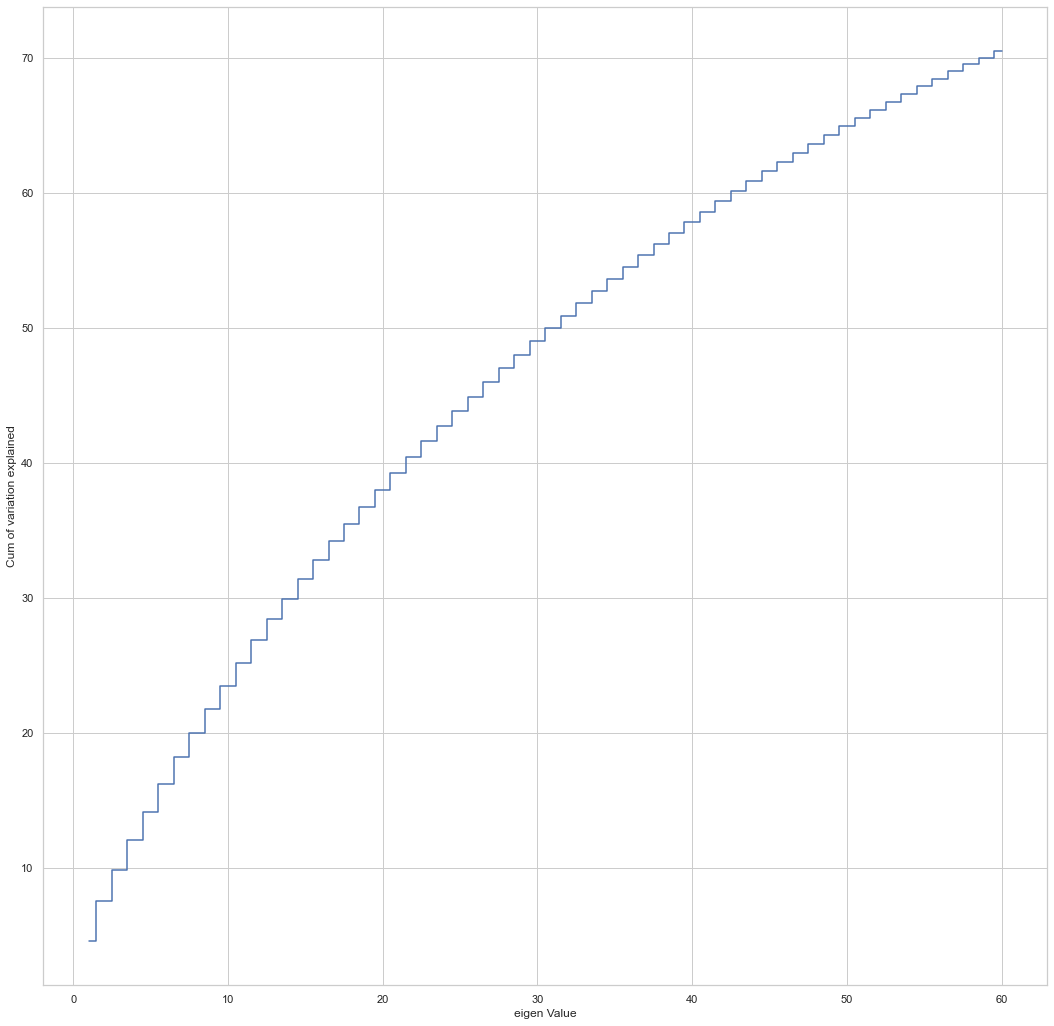

In [170]:
plt.step(list(range(1,61)),np.cumsum(pca60.explained_variance_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

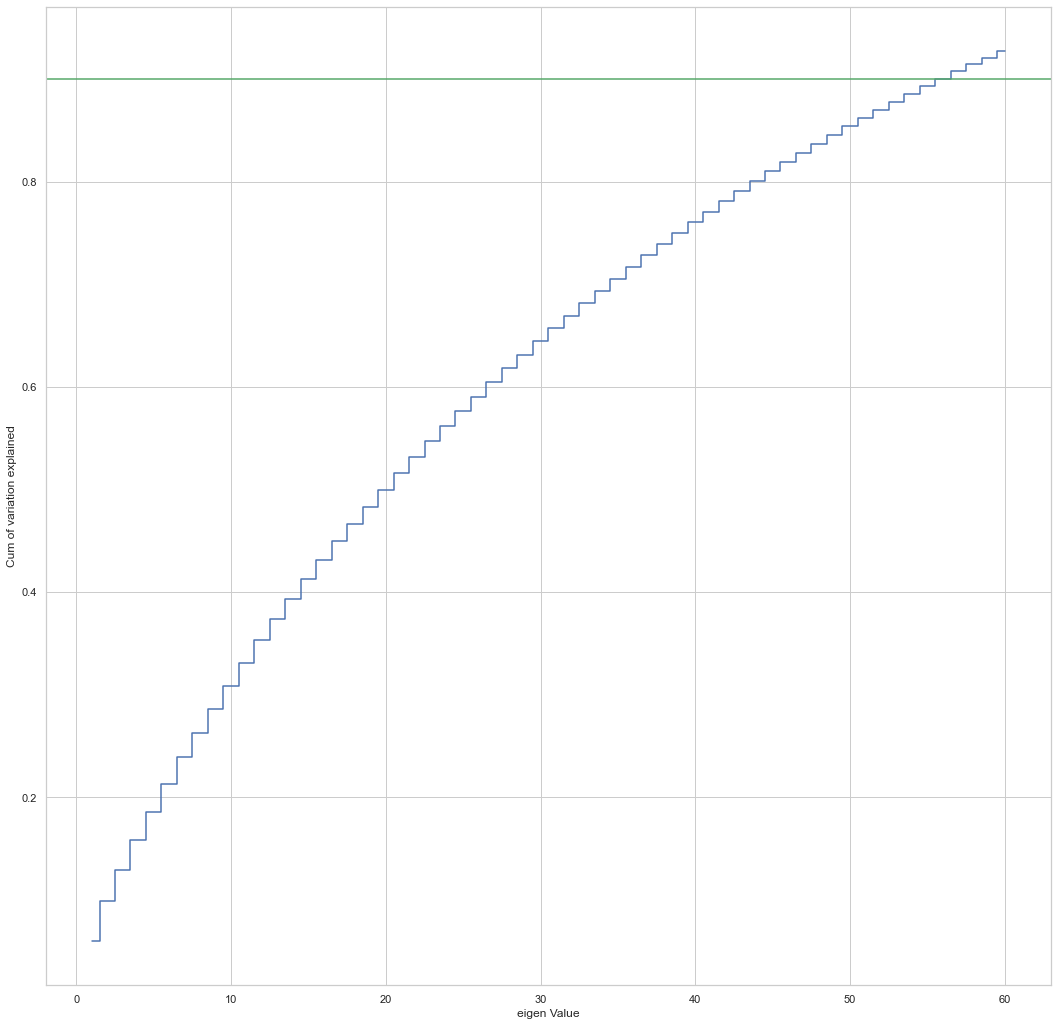

In [171]:
plt.step(list(range(1,61)),np.cumsum(pca60.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y=0.90, color='g', linestyle='-')      # The line cuts between principal components/eigen values 4 and 5         
plt.show()

# Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. DIMENSIONALITY REDUCTION - Now lets select minimum components. By seeing above plot we can choose 55 dimensions which explains more than 90% of variation in the data

In [172]:
pca55 = PCA(n_components= 55)

In [173]:
pca55.fit(Full_X_scaled_df)

PCA(n_components=55)

In [174]:
print(pca55.components_)

[[-2.28685106e-02  3.46944695e-18 -8.14004408e-02 ...  4.12144556e-02
   6.70250253e-02 -8.36007728e-02]
 [-3.26367415e-02  0.00000000e+00  4.08911170e-02 ... -6.02833455e-02
  -1.04716666e-01  9.72532036e-02]
 [ 8.83058061e-02 -1.11022302e-16  9.32856959e-02 ...  1.71553324e-01
  -1.43982667e-01  9.15922404e-02]
 ...
 [ 8.86454236e-02 -9.95297594e-17 -6.90200029e-02 ... -1.30949698e-02
  -1.47126266e-01 -9.24959625e-02]
 [ 1.47979480e-01  4.46691295e-17  4.25012059e-02 ...  7.94232062e-03
   8.22700080e-02  4.69008950e-02]
 [-1.39076783e-01 -2.91867225e-16 -1.36660249e-01 ...  9.85505582e-02
   2.01414955e-02  9.75626514e-02]]


In [175]:
print(pca55.explained_variance_)

[4.56915692 2.93016906 2.28803708 2.27302833 2.08105314 2.03391697
 1.98368677 1.81559927 1.76264703 1.7422818  1.69706806 1.65767021
 1.58204093 1.4936647  1.47193078 1.43610303 1.34488125 1.31017578
 1.26500866 1.24608677 1.21453454 1.19829155 1.18909492 1.12331333
 1.10208359 1.07270001 1.05579662 1.05248246 1.00727497 0.98485646
 0.96576627 0.94295706 0.93622789 0.9115727  0.89649945 0.865512
 0.85172518 0.83081664 0.81873431 0.80701412 0.7818826  0.76600439
 0.75713785 0.73459446 0.7202274  0.70052004 0.68551761 0.65200625
 0.64869547 0.63225167 0.61615398 0.61191053 0.59754008 0.58251562
 0.56424418]


In [176]:
print(pca55.explained_variance_ratio_)

[0.06009994 0.03854168 0.03009546 0.02989805 0.02737292 0.02675292
 0.02609222 0.0238813  0.0231848  0.02291693 0.02232221 0.021804
 0.02080921 0.01964677 0.01936089 0.01888963 0.01768976 0.01723326
 0.01663916 0.01639028 0.01597526 0.01576161 0.01564064 0.01477539
 0.01449614 0.01410965 0.01388731 0.01384372 0.01324909 0.01295421
 0.01270311 0.01240309 0.01231458 0.01199028 0.01179201 0.01138442
 0.01120308 0.01092806 0.01076914 0.01061498 0.01028441 0.01007556
 0.00995894 0.00966241 0.00947344 0.00921422 0.00901689 0.0085761
 0.00853255 0.00831626 0.00810452 0.0080487  0.00785968 0.00766206
 0.00742173]


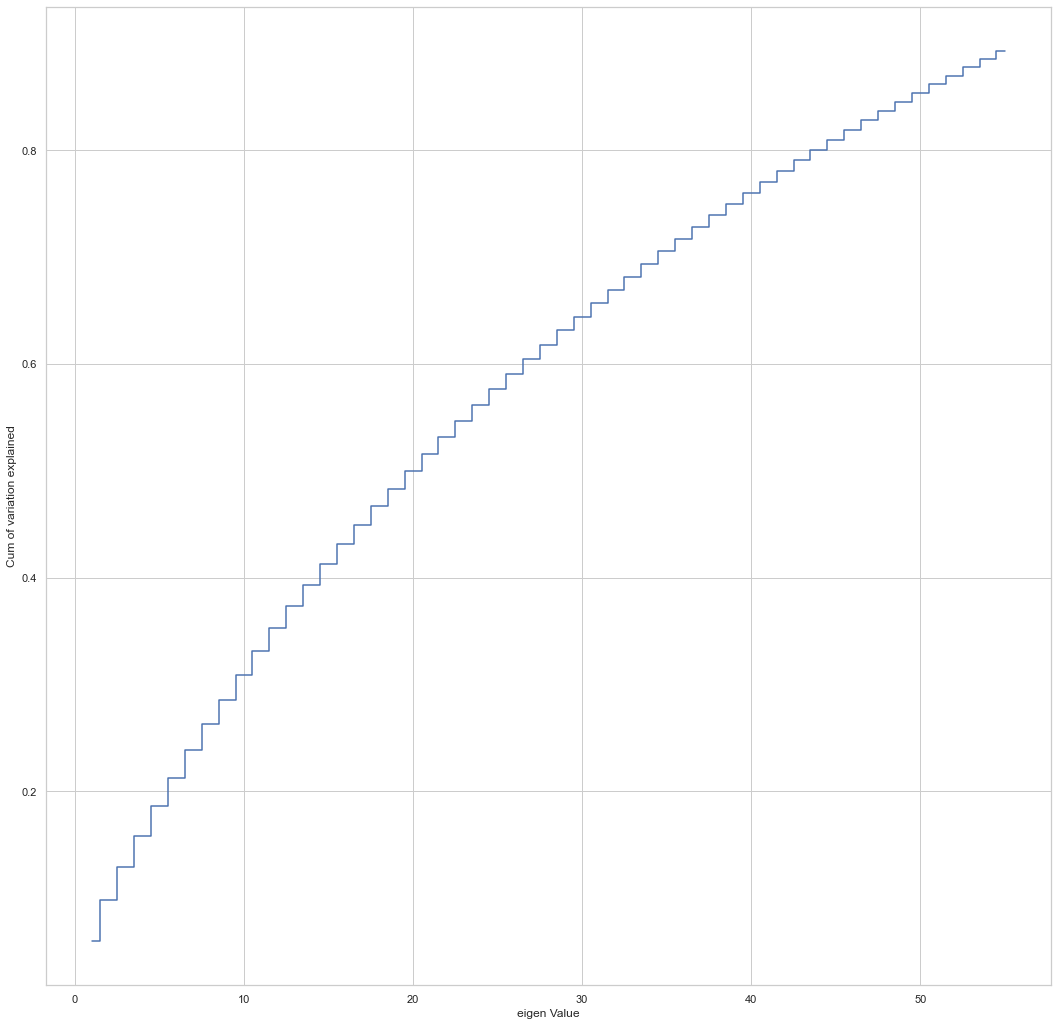

In [177]:
plt.step(list(range(1,56)),np.cumsum(pca55.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [178]:
Xpca55 = pca55.transform(Full_X_scaled_df)

In [179]:
pca55

PCA(n_components=55)

In [180]:
Xpca55

array([[-1.17732605,  0.30145542,  3.91311956, ..., -0.59336254,
        -0.30916284,  0.99608324],
       [-0.65423567, -0.53574385,  1.9157546 , ...,  0.61068632,
         1.24407366, -0.20275197],
       [-3.26732495, -1.89860645, -0.22487125, ..., -0.01350089,
         0.45522839,  0.53071242],
       ...,
       [-2.42274157, -0.3952079 , -2.57167276, ..., -0.44389845,
        -0.4821603 , -0.76353717],
       [-5.24449733, -2.53311321,  1.52650652, ..., -0.69786927,
         0.64870504, -0.21079516],
       [ 3.06621792,  1.19010334, -1.34679788, ..., -0.17101888,
        -1.17447719, -0.48169614]])

In [181]:
tranformed_componenets = pd.DataFrame(Xpca55)

In [182]:
tranformed_componenets.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-1.177326,0.301455,3.913120,-3.510943,-1.762280,0.264754,0.625634,3.990133,0.637735,-2.152373,...,-0.382997,0.728979,-0.694347,-0.482127,-1.350550,1.930931,0.039958,-0.593363,-0.309163,0.996083
1,-0.654236,-0.535744,1.915755,3.112974,1.006224,-0.007442,-0.834716,0.176992,0.946749,-0.179390,...,0.472734,-0.651024,-0.123612,1.202420,0.020259,0.352918,-0.184320,0.610686,1.244074,-0.202752
2,-3.267325,-1.898606,-0.224871,-2.004612,2.184972,-0.855968,1.753106,-0.078386,4.027469,-1.346568,...,-0.568602,0.376076,0.235280,0.183412,-0.494326,-0.352178,-0.720798,-0.013501,0.455228,0.530712
3,-1.956715,0.884209,0.589433,-0.496065,-0.466438,0.076650,0.378989,-2.983519,-1.164900,-2.501159,...,1.686827,0.165725,-1.225275,-0.800127,-2.350570,0.789951,-1.448409,0.005908,-0.734048,0.457172
4,-1.746227,0.150934,-1.103689,1.557344,-0.767055,-0.396426,1.600340,0.965840,0.049387,-0.238875,...,2.149172,-1.390267,-0.815681,1.086793,-0.500517,0.260073,-0.179489,-0.238947,0.282871,-2.005953


# Train KNN model on components selected from above step

In [183]:
KNN_PCA = KNeighborsClassifier(n_neighbors= 2, leaf_size= 1,  p= 1, weights = 'distance')

In [184]:
KNN_PCA.fit(Xpca55, y_os)

KNeighborsClassifier(leaf_size=1, n_neighbors=2, p=1, weights='distance')

# 5. E) Display and explain the classification report in detail. 

In [186]:
KNN_PCA.score(Xpca55, y_os)                       #Answer

1.0

In [187]:
print('We got almost 100% explainable score as it is in-sample data')

We got almost 100% explainable score as it is in-sample data


# 5. F) Apply the above steps for all possible models that you have learnt so far.

In [226]:
# LOGISTIC REGRESSION
params_logistic = {'max_iter': [2000],                 #Answer
                   'penalty': ['l1', 'l2'],
                   'solver': ['liblinear']}
model_logistic = LogisticRegression()
final_tuning_logistic = GridSearchCV(model_logistic, params_logistic, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_os_train_scaled_df, y_os_train)
print(search_logistic.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [225]:
# K- NEAREST NEIGHBOURS
params_knn = {'n_neighbors' : range(1, 10),
              'weights' : ['uniform', 'distance'],
              'p' : [1,2]}
model_knn = KNeighborsClassifier()
final_tuning_knn = GridSearchCV(model_knn, params_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_knn.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


In [227]:
# SUPPORT VECTOR MACHINES
params_svc = {'kernel': ['rbf'],
              'C' : [0.01, 0.1, 1, 10, 100, 1000 ],
              'gamma' : [1, 0.1, 0.001, 0.0001, 0.00001]}
model_svc = svm.SVC()
final_tuning_svc = GridSearchCV(model_svc, params_svc, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_os_train_scaled_df, y_os_train)
print(search_svc.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [242]:
# DECISION TREES
params_dt = {'criterion': ['gini'],
             'max_depth': [3, 4, 5, 6, 7],
             'random_state': [0]}
model_dt = DecisionTreeClassifier()
final_tuning_dt = GridSearchCV(model_dt, params_dt, cv=5).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_dt.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'random_state': 0}


In [224]:
# RANDOM FOREST
params_rf = {'n_estimators': [95, 100, 105],
             'criterion':['entropy'],
             'bootstrap': [True, False],
             'max_depth': [40, 45, 50],
             'max_features': [4, 5, 6],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [9, 10, 11],
             'random_state': [734]}
model_rf = RandomForestClassifier()
final_tuning_rf = GridSearchCV(model_rf, params_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1).fit(X_os_train_scaled_df, y_os_train)
final_tuning_rf.best_params_['random_state']=242
final_tuning_rf.best_estimator_.random_state=242
print(final_tuning_rf.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 40, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 95, 'random_state': 242}


In [245]:
# BAGGING CLASSIFIER
params_bc = {'n_estimators': [20, 30, 40, 50, 60],
             'random_state': [0]}
model_bc = BaggingClassifier()
final_tuning_bc = GridSearchCV(model_bc, params_bc, cv=5).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_bc.best_params_)

{'n_estimators': 20, 'random_state': 0}


In [246]:
# GRADIENT BOOSTING CLASSIFIER
params_gbc = {'n_estimators': [20, 30, 40, 50, 60],
             'random_state': [0]}
model_gbc = GradientBoostingClassifier()
final_tuning_gbc = GridSearchCV(model_gbc, params_gbc, cv=5).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_gbc.best_params_)

{'n_estimators': 60, 'random_state': 0}


In [247]:
# ADA BOOSTING CLASSIFIER
params_abc = {'n_estimators': [20, 30, 40, 50, 60],
             'random_state': [0]}
model_abc = AdaBoostClassifier()
final_tuning_abc = GridSearchCV(model_abc, params_abc, cv=5).fit(X_os_train_scaled_df, y_os_train)
print(final_tuning_abc.best_params_)

{'n_estimators': 60, 'random_state': 0}


In [190]:
#Importing all the ensemble model classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.pipeline import Pipeline

In [255]:
pipe_lines = [pl_LogisticRegression,                      #Creating different ensemble models into a list
              pl_KNeighborsClassifier,
              pl_SupportVectorClassifier,
              pl_DecisionTreeClassifier,
              pl_RandomForestClassifier,
              pl_BaggingClassifier,
              pl_GradientBoostingClassifier,
              pl_AdaBoostClassifier]

In [250]:
#Creating different models using pipeline function and instantiating them along with best paramters chosen above with Grid Search CV Method
pl_LogisticRegression = Pipeline( [('Scalar1', StandardScaler()),
                                 ('lr_classifier', LogisticRegression(max_iter = 2000, penalty= 'l1', solver= 'liblinear'))] )
pl_KNeighborsClassifier = Pipeline( [('Scalar2', StandardScaler()),
                                 ('knn_classifier', KNeighborsClassifier(n_neighbors= 2, p= 1, weights= 'uniform'))] )
pl_SupportVectorClassifier = Pipeline( [('Scalar3', StandardScaler()),
                                 ('svc_classifier', svm.SVC(C= 1, gamma= 1, kernel= 'rbf'))] )
pl_DecisionTreeClassifier = Pipeline( [('Scalar4', StandardScaler()),
                                 ('dt_classifier', DecisionTreeClassifier(criterion = 'gini', random_state= 0)) ])
pl_RandomForestClassifier = Pipeline( [('Scalar5', StandardScaler()),
                                 ('rf_classifier', RandomForestClassifier(bootstrap= True, criterion= 'entropy', max_depth= 40,
                                                                          max_features= 6, min_samples_leaf= 1, min_samples_split=10,
                                                                          n_estimators= 95, random_state= 242)) ])
pl_BaggingClassifier = Pipeline( [('Scalar6', StandardScaler()),
                                  ('bag_classifier', BaggingClassifier(n_estimators= 20, random_state= 0)) ])
pl_GradientBoostingClassifier = Pipeline( [('Scalar7', StandardScaler()),
                                  ('gb_classifier', GradientBoostingClassifier(n_estimators= 60, random_state= 0)) ])
pl_AdaBoostClassifier = Pipeline( [('Scalar8', StandardScaler()),
                                  ('ab_classifier', AdaBoostClassifier(n_estimators= 60, random_state= 0)) ])

In [251]:
best_accuracy = 0.0                                         #Initially creating the best paramters to 0
best_classifier = 0
best_pipleine = ''

In [256]:
pipe_dict = {0 : 'Logistic Regression',                    #creating a dictionary for all the classifiers for mapping
             1 : 'K Nearest Neighbours',
             2 : 'Support vector Classifier',
             3 : 'Decision Tree Classifier',
             4 : 'Random Forest Classifier',
             5 : 'Bagging Classifier',
             6 : 'Gradient Boosting Classifier',
             7 : 'Ada Boost Classifier'}

In [257]:
#This is for just printing all the classifiers
for i, model in enumerate(pipe_lines):
    print(i)
    print(model)

0
Pipeline(steps=[('Scalar1', StandardScaler()),
                ('lr_classifier',
                 LogisticRegression(max_iter=2000, penalty='l1',
                                    solver='liblinear'))])
1
Pipeline(steps=[('Scalar2', StandardScaler()),
                ('knn_classifier', KNeighborsClassifier(n_neighbors=2, p=1))])
2
Pipeline(steps=[('Scalar3', StandardScaler()),
                ('svc_classifier', SVC(C=1, gamma=1))])
3
Pipeline(steps=[('Scalar4', StandardScaler()),
                ('dt_classifier', DecisionTreeClassifier(random_state=0))])
4
Pipeline(steps=[('Scalar5', StandardScaler()),
                ('rf_classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=40,
                                        max_features=6, min_samples_split=10,
                                        n_estimators=95, random_state=242))])
5
Pipeline(steps=[('Scalar6', StandardScaler()),
                ('bag_classifier',
                 BaggingClassifier(n_

In [258]:
# Function to to fit data for each ensemble classifier
for pipe in pipe_lines:
    pipe.fit(X_os_train_scaled_df, y_os_train)

In [259]:
for i, model in enumerate(pipe_lines):                  #Calculating test accuracy score of test data fro each ensemble classifier
    print(str(pipe_dict[i]) + ' Test Accuracy ' + str(model.score(X_os_test_scaled_df, y_os_test)) )

Logistic Regression Test Accuracy 0.7337883959044369
K Nearest Neighbours Test Accuracy 0.9744027303754266
Support vector Classifier Test Accuracy 1.0
Decision Tree Classifier Test Accuracy 0.9641638225255973
Random Forest Classifier Test Accuracy 1.0
Bagging Classifier Test Accuracy 0.9812286689419796
Gradient Boosting Classifier Test Accuracy 0.9488054607508533
Ada Boost Classifier Test Accuracy 0.8959044368600683


# 6. A) Display and compare all the models designed with their train and test accuracies.

In [260]:
pipe_lines

[Pipeline(steps=[('Scalar1', StandardScaler()),
                 ('lr_classifier',
                  LogisticRegression(max_iter=2000, penalty='l1',
                                     solver='liblinear'))]),
 Pipeline(steps=[('Scalar2', StandardScaler()),
                 ('knn_classifier', KNeighborsClassifier(n_neighbors=2, p=1))]),
 Pipeline(steps=[('Scalar3', StandardScaler()),
                 ('svc_classifier', SVC(C=1, gamma=1))]),
 Pipeline(steps=[('Scalar4', StandardScaler()),
                 ('dt_classifier', DecisionTreeClassifier(random_state=0))]),
 Pipeline(steps=[('Scalar5', StandardScaler()),
                 ('rf_classifier',
                  RandomForestClassifier(criterion='entropy', max_depth=40,
                                         max_features=6, min_samples_split=10,
                                         n_estimators=95, random_state=242))]),
 Pipeline(steps=[('Scalar6', StandardScaler()),
                 ('bag_classifier',
                  BaggingCl

In [212]:
for i, model in enumerate(pipe_lines):              #Answer
     print( 'Train score is ' + str(model.score(X_os_train_scaled_df, y_os_train)))
     print('Test score is ' + str(model.score(X_os_test_scaled_df, y_os_test)))
     print('\n')

Train score is 0.7764957264957265
Test score is 0.7337883959044369


Train score is 1.0
Test score is 0.9641638225255973


Train score is 1.0
Test score is 1.0


Train score is 1.0
Test score is 0.9880546075085325


Train score is 0.9876068376068377
Test score is 0.9641638225255973


Train score is 0.9247863247863248
Test score is 0.8924914675767918




# 6. B) Select the final best trained model along with your detailed comments for selecting this model.

In [261]:
for i, model in enumerate(pipe_lines):        #Answer      #Selecting and printing the best classifier based on test accuracy score
     if model.score(X_os_test_scaled_df, y_os_test) > best_accuracy:
         best_accuracy = model.score(X_os_test_scaled_df, y_os_test)
         print(best_accuracy)
         best_pipleine = model
         best_classifier = i
        
print('The best model is ' + pipe_dict[best_classifier] + ' with score of ' + str(best_accuracy) )

0.7337883959044369
0.9744027303754266
1.0
The best model is Support vector Classifier with score of 1.0


# 6. C) Pickle the selected model for future use

In [262]:
import pickle

In [263]:
with open('best_model_svc_classifier', 'wb') as files:  #Answer   # Adding the best model classifier to a pickle file in write mode
    pickle.dump(pl_SupportVectorClassifier, files)

In [264]:
with open('best_model_svc_classifier' , 'rb') as files:   # Opening the best model classifier in read mode
    ab = pickle.load(files)

In [265]:
print(ab)

Pipeline(steps=[('Scalar3', StandardScaler()),
                ('svc_classifier', SVC(C=1, gamma=1))])


# 6. D) Write your conclusion on the results. 

In [266]:
#Answer
print('Along with Grid Search CV results and using the best hyper parameters and using ensemble techniques we got best results in Support Vector Classifier and Random Forest Classifiers. However, best and ideal results we got in Support Vector Classifier')

Along with Grid Search CV results and using the best hyper parameters and using ensemble techniques we got best results in Support Vector Classifier and Random Forest Classifiers. However, best and ideal results we got in Support Vector Classifier


In [272]:
print('********************************** END OF PROJECT ******************************************')

********************************** END OF PROJECT ******************************************
